# Machine Learning 2022
## Lab. 4 - Classification
### Imię i nazwisko: Kacper Moździerz
### Nr albumu: 401733/
### Data: 22.03.2022

### Grupa: wtorek 9:30 - 11:00


In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from scipy.spatial import distance
from sklearn.metrics import accuracy_score
import numpy as np

Ex. 1 - kNN - own implementation

In [2]:
db_iris = datasets.load_iris()

 
#separate the set for teaching and testing, test_size - percentage share (example 70% for training and 30% for testing)
features_train, features_test, labels_train, labels_test = train_test_split(db_iris.data, db_iris.target, test_size=0.5, random_state=5)
 
# implementation of k_NN algorithm
def k_NN(features_test, features_train, labels_train, k):
    classifictation = np.zeros(features_train.shape[0])
    for idx, feature in enumerate(features_test):
        distances = np.zeros(features_train.shape[0])
        for idxx in range(features_train.shape[0]):
            distances[idxx] = distance.euclidean(features_train[idxx], feature)
        neighbours_labels = labels_train[(np.argpartition(distances, k)[0:k])]
        classifictation[idx] = max(set(neighbours_labels), key=list(neighbours_labels).count)
    return classifictation

 

In [3]:
import matplotlib.pyplot as plt
err_test = np.zeros(40)
err_train = np.zeros(40) 

for k in range(1,41):
    test_classify = k_NN(features_test,features_train,labels_train, k)
    train_classify = k_NN(features_train,features_train,labels_train, k)
    err_test[k-1] = np.sum(test_classify != labels_test)
    err_train[k-1] = np.sum(train_classify != labels_train)



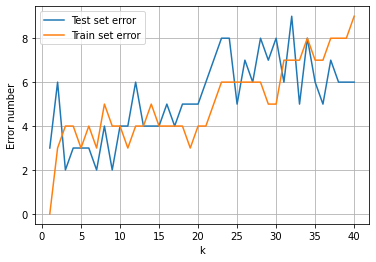

In [4]:
plt.plot(range(1, 41), err_test, label="Test set error")
plt.plot(range(1, 41), err_train, label="Train set error")
plt.legend()
plt.xlabel('k')
plt.ylabel('Error number')
plt.grid(True)
plt.show()

In [5]:
classifictation = k_NN(features_test, features_train, labels_train, 3)

# Checking the effectiveness of the classifier
output = accuracy_score(labels_test, classifictation)
print(f"Accuracy score of classifier {100*output}% for best k number, k= {3}")

Accuracy score of classifier 97.33333333333334% for best k number, k= 3


Ex. 2 - kNN - Python

In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [7]:
err_test = np.zeros(40)
err_train = np.zeros(40) 

for k in range(1,41):
    kNN = KNeighborsClassifier(k)
    kNN.fit(features_train, labels_train)
    test_classify = kNN.predict(features_test)
    train_classify = kNN.predict(features_train)
    err_test[k-1] = np.sum(test_classify != labels_test)
    err_train[k-1] = np.sum(train_classify != labels_train)

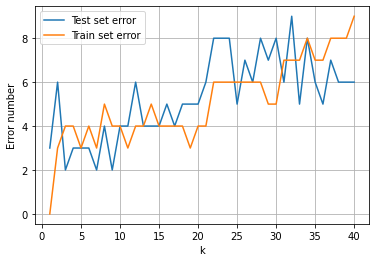

In [8]:
plt.plot(range(1, 41), err_test, label="Test set error")
plt.plot(range(1, 41), err_train, label="Train set error")
plt.legend()
plt.xlabel('k')
plt.ylabel('Error number')
plt.grid(True)
plt.show()

As we can see on the graph above - we have got very similar results using self-implemented kNN algorithm and kNN algorithm from Python library.

Ex. 3 - Decision trees

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn import tree
from sklearn.model_selection import train_test_split
from scipy.io import loadmat

Ex.1 - Importing and loading mnist dataset using keras.dataset

In [10]:
from keras.datasets import mnist


In [11]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [12]:
X = np.concatenate((train_X, test_X))
y = np.concatenate((train_y, test_y))

Data standarization

In [13]:
for i in range(X.shape[0]):
    X[i,:] = X[i,:]/np.std(X[i,:])

y[np.where(y==10)]=0

Ex. 2 - number of digits and the number of pixels per image

In [14]:
print(f"Number of digits: {len(np.unique(y))}")
print(f"Number of pixels per image: {X.shape[1]*X.shape[2]}")

Number of digits: 10
Number of pixels per image: 784


Ex.3 - displaying sample digits from dataset

In [15]:
def plot_mnist(images, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.05)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i], cmap=plt.cm.gray)
        plt.xticks(())
        plt.yticks(())

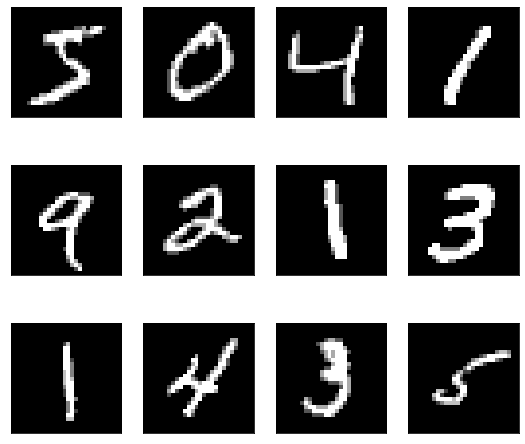

In [16]:
plot_mnist(X)

Ex. 4 - reshaping image data for a one-dimensional format by arranging successive lines. Dividing data for test and train set

In [17]:
X = X.reshape(X.shape[0], X.shape[1] * X.shape[2])
X.shape

(70000, 784)

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=15)

Ex. 5 -  Creating an instance of the classifier.  Training and predicting for test data.

In [19]:
DEPTH = 10
tree_classifier = tree.DecisionTreeClassifier(max_depth=DEPTH)
tree_classifier.fit(x_train, y_train)
prediction = tree_classifier.predict(x_test)

Ex. 6 - F1 score, confusion matrix and classification report

F1 score

In [20]:
f1_ = f1_score(y_test, prediction, average='macro')

print(f"F1 score: {f1_}")

F1 score: 0.8231471572144425


Confusion Matrix

In [21]:
c_mtx = confusion_matrix(y_test, prediction)

print(f"Confusion matrix: \n {c_mtx}")

Confusion matrix: 
 [[2471    0   77   27   13   49   48   15   38   12]
 [   0 2994   40   43    8   26   14   16   57    9]
 [  68   31 2272   81   71   53   72   65  108   18]
 [  17   36   86 2199   25  229   38   55   70  100]
 [  17   12   85   51 2217   62   55   12   26  210]
 [  45   17   61  223   47 1855   83   23   69   61]
 [  60   16  103   12   89   39 2311   10   69    9]
 [  16   29   66   50   45   23    2 2516   31  138]
 [  45   47  120   90   49   91   76   20 2053  106]
 [  20   11   95   81  137  110   13   74   21 2225]]


Classification Report

In [22]:
print(f"Classification Report.\n")
print(classification_report(y_test, prediction))

Classification Report.

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      2750
           1       0.94      0.93      0.94      3207
           2       0.76      0.80      0.78      2839
           3       0.77      0.77      0.77      2855
           4       0.82      0.81      0.81      2747
           5       0.73      0.75      0.74      2484
           6       0.85      0.85      0.85      2718
           7       0.90      0.86      0.88      2916
           8       0.81      0.76      0.78      2697
           9       0.77      0.80      0.78      2787

    accuracy                           0.83     28000
   macro avg       0.82      0.82      0.82     28000
weighted avg       0.83      0.83      0.83     28000



As we can see at classification report - we received quite good results of classifying test data. We didn't obtained precision score lower than 70% for no class. Values of recall parameter are also at a satisfactory level. 

High precision means that our algorithm returns more relevant results than irrelevant ones, and high recall means that an algorithm returns most of the relevant results. 